# Find the overlap of Comet and SpectrumMill results

In [1]:
import pandas as pd


In [21]:
comet_results_file = '/Users/zacharymcgrath/Downloads/nod2_e3.txt'
comet_sep = '\t'

specmil_results_file = '/Users/zacharymcgrath/Downloads/NOD2_E3_results.ssv'
specmil_sep = ';'

comet_results = pd.read_csv(comet_results_file, sep=comet_sep)
comet_results = comet_results[comet_results['scan'] == 1]
specmil_results = pd.read_csv(specmil_results_file, sep=specmil_sep)


In [22]:
comet_results.head(10)

,scan,num,charge,exp_neutral_mass,calc_neutral_mass,e-value,xcorr,delta_cn,sp_score,ions_matched,ions_total,plain_peptide,modified_peptide,prev_aa,next_aa,protein,protein_count,modifications
1,1,2,614.314053,614.313623,2.180,0.8666,0.0456,46.9,3,12,PSRGGAA,L.PSRGGAA.K,L,K,sp|Q3MI99|CCBE1_MOUSE,1,-,NaN
2,1,2,676.226411,676.230013,54.900,0.3354,0.0107,10.0,2,12,GDEGDGQ,T.GDEGDGQ.A,T,A,sp|Q9CT10|RANB3_MOUSE,1,-,NaN
2,1,2,676.226411,676.230013,54.900,0.3354,0.0107,10.0,2,12,GDEGNAD,T.GDEGNAD.N,T,N,sp|Q61329|ZFHX3_MOUSE,1,-,NaN
3,1,2,678.223787,678.227904,0.651,0.5261,0.2239,25.5,2,10,DQDCAA,D.DQDCAA.E,D,E,"sp|P97864|CASP7_MOUSE,sp|Q8R0S6|WFKN1_MOUSE",2,4_S_57.021464,NaN
4,1,2,680.223785,680.225796,11.000,0.3108,0.2601,10.0,1,10,CECAAA,G.CECAAA.L,G,L,sp|B9EJR8|DAAF5_MOUSE,1,"1_S_57.021464,3_S_57.021464",NaN
5,1,2,614.314053,614.313623,2.420,0.7935,0.0486,69.0,4,12,PSRGGAA,L.PSRGGAA.K,L,K,sp|Q3MI99|CCBE1_MOUSE,1,-,NaN
6,1,3,1163.316641,1163.323903,50.500,0.2278,1.0000,3.1,1,32,MMECSEACD,S.M[15.9949]M[15.9949]ECSEACD.T,S,T,sp|Q6PCN7|HLTF_MOUSE,1,"1_V_15.994900,2_V_15.994900,4_S_57.021464,8_S_...",NaN
7,1,3,1616.136434,1616.125589,623.000,0.0832,0.0277,0.0,0,56,LIILVSLLIILPLAL,L.LIILVSLLIILPLAL.M,L,M,sp|Q3U1J0|S38A5_MOUSE,1,-,NaN
9,1,2,614.314053,614.313623,2.190,0.7383,0.1179,70.3,4,12,GRPSGAA,T.GRPSGAA.E,T,E,sp|P04235|CD3D_MOUSE,1,-,NaN
10,1,2,680.223785,680.225796,0.605,0.3839,0.2893,10.0,1,10,CECAAA,G.CECAAA.L,G,L,sp|B9EJR8|DAAF5_MOUSE,1,"1_S_57.021464,3_S_57.021464",NaN


In [20]:
print(comet_results[['scan', 'num']])

       scan  num
1         1    2
1         2    2
1         3    2
1         4    2
1         5    2
...     ...  ...
12752     1    3
12752     2    3
12752     3    3
12752     4    3
12752     5    3

[53738 rows x 2 columns]


In [7]:
specmil_results.head(2)

,number,filename,parent_charge,score,deltaForwardReverseScore,deltaRank1Rank2Score,percent_scored_peak_intensity,totalIntensity,previous_aa,sequence,next_aa,retentionTimeMin,chromatographicPeakWidthSec,parent_m_over_z,species,entry_name
0,1,NOD2_E3.13446.13477.2,2,10.10,10.10,9.91,84.5,183000.0,(E),DPQVEQLEL,(-),48.35,26.0,535.7725,MOUSE,ins1C18
1,2,NOD2_E3.18005.18246.2,2,12.84,11.07,12.84,97.8,40000000.0,(G),DLQTLALEVA,(-),65.78,29.0,536.8007,MOUSE,ins1C3


In [23]:
cometonly = []
both = []

cpeps = list(set(comet_results['ions_total']))
speps = list(set(specmil_results['sequence']))

while len(cpeps):
    if cpeps[0] in speps:
        speps.remove(cpeps[0])
        both.append(cpeps.pop(0))        
        
    else:
        cometonly.append(cpeps.pop(0))
    

In [24]:
print(len(both))


864


In [25]:
print(len(speps))

81


In [26]:
print(len(cometonly))
print(len(comet_results))

7404
10854


In [27]:
from matplotlib_venn import venn2, venn2_circles, venn2_unweighted
from matplotlib_venn import venn3, venn3_circles
from matplotlib import pyplot as plt

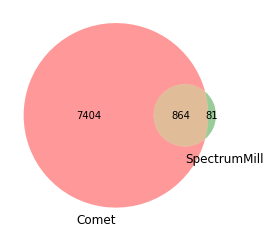

In [28]:
venn2(subsets = (len(cometonly), len(speps), len(both)), set_labels=('Comet', 'SpectrumMill'))


Text(0.5, 1.0, 'delta_cn dist of all scores')

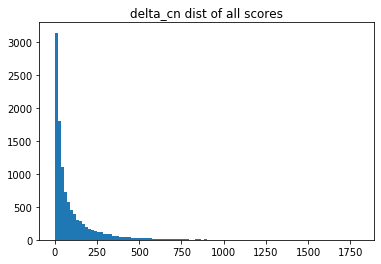

In [29]:
plt.hist(comet_results['delta_cn'], bins=100)
plt.title('delta_cn dist of all scores')

Text(0.5, 1.0, 'sp_score dist of all scores')

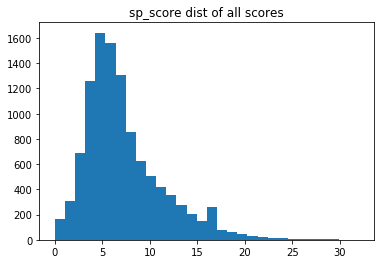

In [30]:
plt.hist(comet_results['sp_score'], bins=30)
plt.title('sp_score dist of all scores')

Text(0.5, 1.0, 'xcorr dist for all scores')

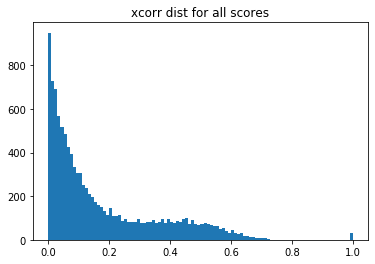

In [31]:
plt.hist(comet_results['xcorr'], bins=100)
plt.title('xcorr dist for all scores')

In [32]:
# get the subset of scores that overlapped with spectrum mill
overlapped = comet_results.loc[comet_results['ions_total'].isin(both)]

Text(0.5, 1.0, 'delta_cn score of results found in both')

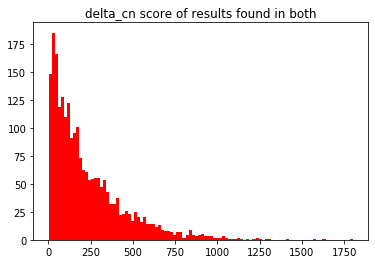

In [33]:
plt.hist(overlapped['delta_cn'], bins = 100, color='r')
plt.title('delta_cn score of results found in both')

Text(0.5, 1.0, 'sp_score score of results found in both')

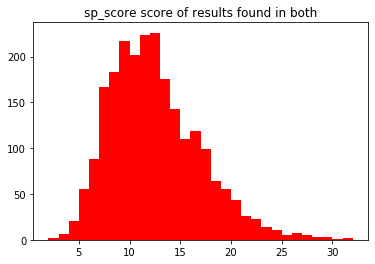

In [34]:
plt.hist(overlapped['sp_score'], bins = 30, color='r')
plt.title('sp_score score of results found in both')

Text(0.5, 1.0, 'xcorr score of results found in both')

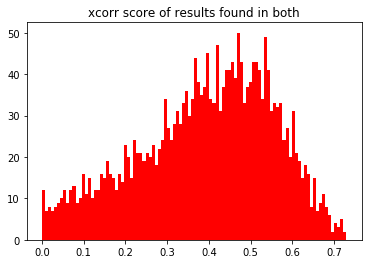

In [36]:
plt.hist(overlapped['xcorr'], bins=100, color='r')
plt.title('xcorr score of results found in both')